In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv('data_austin_weather.csv', header=0)
del df['Date']
del df['Events']
df = df.replace('T', 0.0)  
df = df.replace('-', 0.0) 
df = df.apply(pd.to_numeric)
df.dtypes

TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
dtype: object

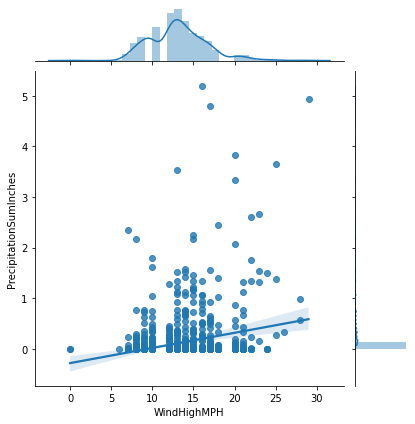

In [ ]:
sns.jointplot(x='WindHighMPH', y='PrecipitationSumInches', data=df,kind = 'reg')

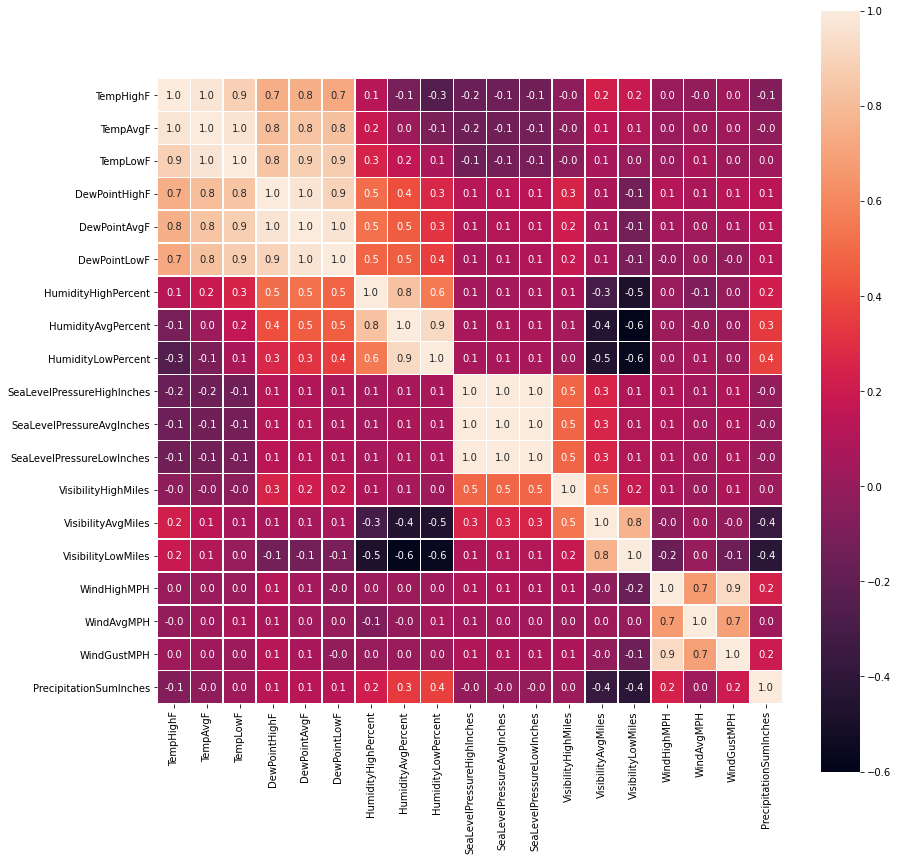

In [ ]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,square = True,fmt= '.1f',ax=ax)

In [ ]:
#removing unecessary details
df_feature=df[['HumidityAvgPercent','HumidityLowPercent','PrecipitationSumInches']]
df_feature.info()
df_feature = df_feature.replace('T', 0.0)  
df_feature = df_feature.replace('-', 0.0) 
df_feature = df_feature.apply(pd.to_numeric)
df_feature.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HumidityAvgPercent      1319 non-null   float64
 1   HumidityLowPercent      1319 non-null   float64
 2   PrecipitationSumInches  1319 non-null   float64
dtypes: float64(3)
memory usage: 31.0 KB


HumidityAvgPercent        float64
HumidityLowPercent        float64
PrecipitationSumInches    float64
dtype: object

In [ ]:
x= df_feature.drop('PrecipitationSumInches',axis= 1)
y = df['PrecipitationSumInches']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test =train_test_split(x,y,test_size=0.2,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(x_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(15, activation="relu", input_shape=[2]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="CategoricalHinge", 
              optimizer=keras.optimizers.SGD(lr=0.2), 
              metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3145 - accuracy: 0.7573 - val_loss: 0.2384 - val_accuracy: 0.7311
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.7573 - val_loss: 0.2656 - val_accuracy: 0.7311
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 0.7560 - val_loss: 0.2385 - val_accuracy: 0.7311
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.7560 - val_loss: 0.2385 - val_accuracy: 0.7311
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.7560 - val_loss: 0.2330 - val_accuracy: 0.7311
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.7573 - val_loss: 0.2329 - val_accuracy: 0.7311
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.7573 - val_loss: 0.2503 - val_accuracy: 0.7311
Epoch 8/20
25/25 [==

In [ ]:

from sklearn.model_selection import train_test_split
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores[1]

accuracy: 76.52%


0.7651515007019043